In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import generate_sales_data
import os

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
print("Generating sales data...")
sales_df = generate_sales_data()

# Save initial data
sales_df.to_csv('data/initial.csv', index=False)
print("Initial data shape:", sales_df.shape)
print("\nFirst 5 rows of initial data:")
display(sales_df.head())

Generating sales data...
Initial data shape: (12, 5)

First 5 rows of initial data:


,Date,Product_A,Product_B,Product_C,Product_D
0,2025-01-01,70,55,37,17
1,2025-02-01,80,36,29,19
2,2025-03-01,85,56,51,29
3,2025-04-01,74,35,43,37
4,2025-05-01,69,80,23,27


In [6]:
print("Building enhanced DataFrame with metrics...")

# Create a copy for the enhanced DataFrame
enhanced_df = sales_df.copy()

# Rename Date to Month for clarity
enhanced_df = enhanced_df.rename(columns={'Date': 'Month'})

# Extract month name for better readability
enhanced_df['Month_Name'] = enhanced_df['Month'].dt.strftime('%B')

# Calculate metrics
enhanced_df['Total_Sales'] = enhanced_df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum(axis=1)
enhanced_df['Average_Sales'] = enhanced_df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].mean(axis=1)

# Month-over-Month Growth
enhanced_df['Month_over_Month_Growth'] = enhanced_df['Total_Sales'].pct_change() * 100

# Assign quarters
def get_quarter(month):
    if month <= 3:
        return 'Q1'
    elif month <= 6:
        return 'Q2'
    elif month <= 9:
        return 'Q3'
    else:
        return 'Q4'

enhanced_df['Quarter'] = enhanced_df['Month'].dt.month.apply(get_quarter)

# Find products with max and min sales each month
product_columns = ['Product_A', 'Product_B', 'Product_C', 'Product_D']
enhanced_df['Max_Sales_Product'] = enhanced_df[product_columns].idxmax(axis=1)
enhanced_df['Min_Sales_Product'] = enhanced_df[product_columns].idxmin(axis=1)

# Replace Product_ with just letter for readability
enhanced_df['Max_Sales_Product'] = enhanced_df['Max_Sales_Product'].str.replace('Product_', '')
enhanced_df['Min_Sales_Product'] = enhanced_df['Min_Sales_Product'].str.replace('Product_', '')

print("Enhanced DataFrame created!")
print("Shape:", enhanced_df.shape)
print("\nEnhanced DataFrame preview:")
display(enhanced_df.head())

# Save enhanced DataFrame
enhanced_df.to_csv('data/final.csv', index=False)
print("\nEnhanced data saved to data/final.csv")

Building enhanced DataFrame with metrics...
Enhanced DataFrame created!
Shape: (12, 12)

Enhanced DataFrame preview:


,Month,Product_A,Product_B,Product_C,Product_D,Month_Name,Total_Sales,Average_Sales,Month_over_Month_Growth,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,70,55,37,17,January,179,44.75,NaN,Q1,A,D
1,2025-02-01,80,36,29,19,February,164,41.00,-8.379888,Q1,A,D
2,2025-03-01,85,56,51,29,March,221,55.25,34.756098,Q1,A,D
3,2025-04-01,74,35,43,37,April,189,47.25,-14.479638,Q2,A,B
4,2025-05-01,69,80,23,27,May,199,49.75,5.291005,Q2,B,C



Enhanced data saved to data/final.csv


In [7]:
print("=== KEY STATISTICS ===")
print(f"Total annual sales: {enhanced_df['Total_Sales'].sum():,}")
print(f"Average monthly sales: {enhanced_df['Total_Sales'].mean():.1f}")
print(f"Highest monthly sales: {enhanced_df['Total_Sales'].max()}")
print(f"Lowest monthly sales: {enhanced_df['Total_Sales'].min()}")

print("\nProduct performance (annual totals):")
for product in product_columns:
    total = enhanced_df[product].sum()
    print(f"{product}: {total:,} units")

=== KEY STATISTICS ===
Total annual sales: 2,406
Average monthly sales: 200.5
Highest monthly sales: 264
Lowest monthly sales: 161

Product performance (annual totals):
Product_A: 904 units
Product_B: 685 units
Product_C: 486 units
Product_D: 331 units


In [8]:
print("=== PIVOT TABLES & QUARTERLY SUMMARIES ===")

# Pivot table: Average sales per quarter for each product
quarterly_pivot = enhanced_df.groupby('Quarter')[product_columns].mean().round(2)
print("Average sales per quarter by product:")
display(quarterly_pivot)

# Total sales per quarter
quarterly_totals = enhanced_df.groupby('Quarter')['Total_Sales'].sum()
print("\nTotal sales per quarter:")
display(quarterly_totals)

# Create a comprehensive output DataFrame
output_data = []

# Add monthly data
for _, row in enhanced_df.iterrows():
    output_data.append({
        'Period_Type': 'Monthly',
        'Period': row['Month_Name'],
        'Quarter': row['Quarter'],
        'Product_A': row['Product_A'],
        'Product_B': row['Product_B'],
        'Product_C': row['Product_C'],
        'Product_D': row['Product_D'],
        'Total_Sales': row['Total_Sales'],
        'Growth_Rate': row['Month_over_Month_Growth']
    })

# Add quarterly averages
for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
    quarter_data = enhanced_df[enhanced_df['Quarter'] == quarter]
    if not quarter_data.empty:
        output_data.append({
            'Period_Type': 'Quarterly_Avg',
            'Period': f'{quarter} Average',
            'Quarter': quarter,
            'Product_A': quarter_data['Product_A'].mean(),
            'Product_B': quarter_data['Product_B'].mean(),
            'Product_C': quarter_data['Product_C'].mean(),
            'Product_D': quarter_data['Product_D'].mean(),
            'Total_Sales': quarter_data['Total_Sales'].mean(),
            'Growth_Rate': None
        })

# Add quarterly totals
for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
    quarter_data = enhanced_df[enhanced_df['Quarter'] == quarter]
    if not quarter_data.empty:
        output_data.append({
            'Period_Type': 'Quarterly_Total',
            'Period': f'{quarter} Total',
            'Quarter': quarter,
            'Product_A': quarter_data['Product_A'].sum(),
            'Product_B': quarter_data['Product_B'].sum(),
            'Product_C': quarter_data['Product_C'].sum(),
            'Product_D': quarter_data['Product_D'].sum(),
            'Total_Sales': quarter_data['Total_Sales'].sum(),
            'Growth_Rate': None
        })

output_df = pd.DataFrame(output_data)
output_df.to_csv('data/output.csv', index=False)
print("Output data saved to data/output.csv")

=== PIVOT TABLES & QUARTERLY SUMMARIES ===
Average sales per quarter by product:


,Product_A,Product_B,Product_C,Product_D
Quarter,,,,
Q1,78.33,49.00,39.00,21.67
Q2,78.33,60.00,34.67,26.67
Q3,70.33,62.00,35.67,34.33
Q4,74.33,57.33,52.67,27.67



Total sales per quarter:


Quarter
Q1    564
Q2    599
Q3    607
Q4    636
Name: Total_Sales, dtype: int64

Output data saved to data/output.csv


In [9]:
print("=== KEY INSIGHTS ===")

# Best month
best_month_idx = enhanced_df['Total_Sales'].idxmax()
best_month = enhanced_df.loc[best_month_idx, 'Month_Name']
best_month_sales = enhanced_df.loc[best_month_idx, 'Total_Sales']
print(f" Best Month: {best_month} with {best_month_sales:,} total sales")

# Best product
product_totals = enhanced_df[product_columns].sum()
best_product = product_totals.idxmax()
best_product_sales = product_totals.max()
print(f" Best Product: {best_product} with {best_product_sales:,} annual sales")

# Best quarter
best_quarter = quarterly_totals.idxmax()
best_quarter_sales = quarterly_totals.max()
print(f" Best Quarter: {best_quarter} with {best_quarter_sales:,} total sales")

# Additional insights
print(f"\n Additional Insights:")
print(f"• Average monthly growth rate: {enhanced_df['Month_over_Month_Growth'].mean():.1f}%")
print(f"• Most consistent product: {enhanced_df[product_columns].std().idxmin()}")
print(f"• Most volatile product: {enhanced_df[product_columns].std().idxmax()}")

=== KEY INSIGHTS ===
 Best Month: August with 264 total sales
 Best Product: Product_A with 904 annual sales
 Best Quarter: Q4 with 636 total sales

 Additional Insights:
• Average monthly growth rate: 3.2%
• Most consistent product: Product_D
• Most volatile product: Product_B


=== VISUALIZATIONS ===


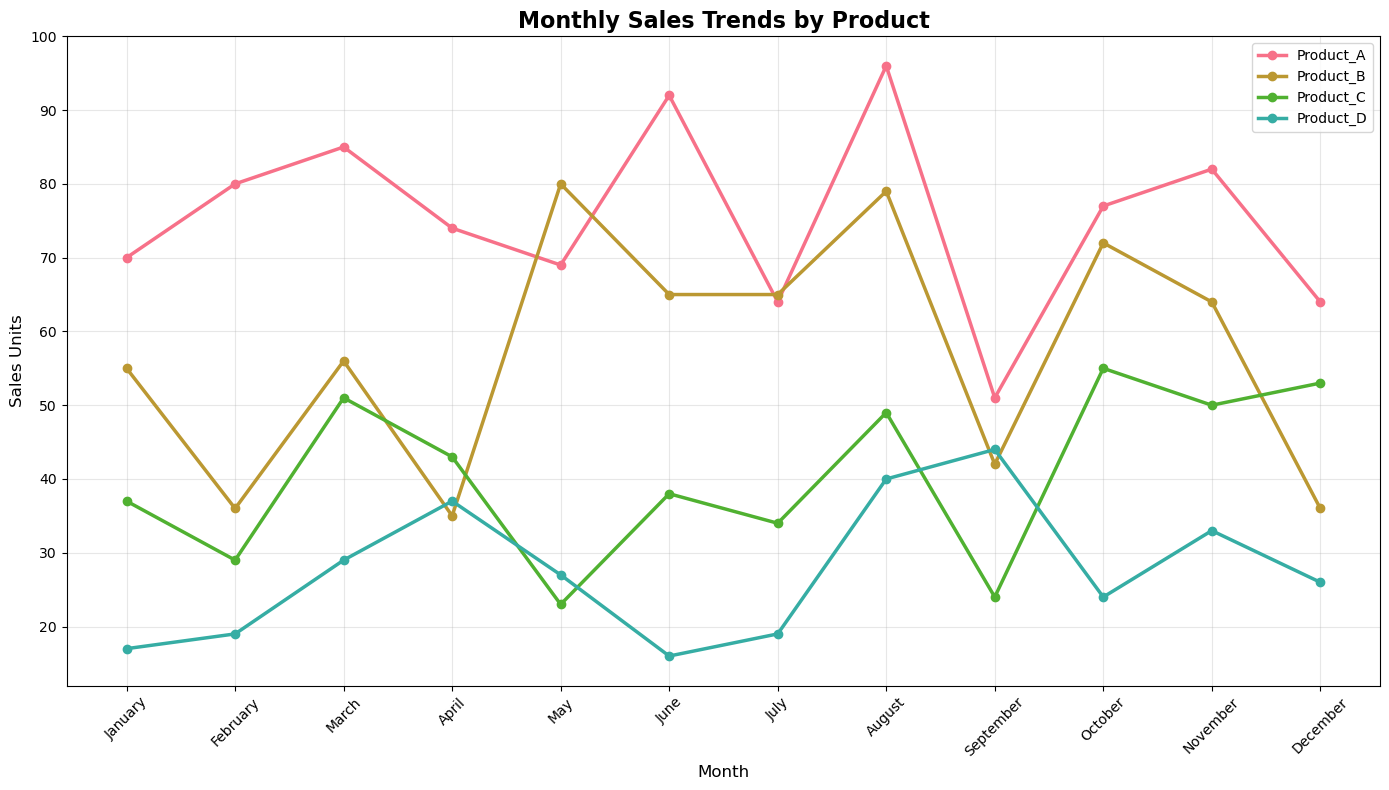

In [10]:
print("=== VISUALIZATIONS ===")

plt.figure(figsize=(14, 8))
months = enhanced_df['Month_Name']

for product in product_columns:
    plt.plot(months, enhanced_df[product], marker='o', linewidth=2.5, label=product, markersize=6)

plt.title('Monthly Sales Trends by Product', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Units', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

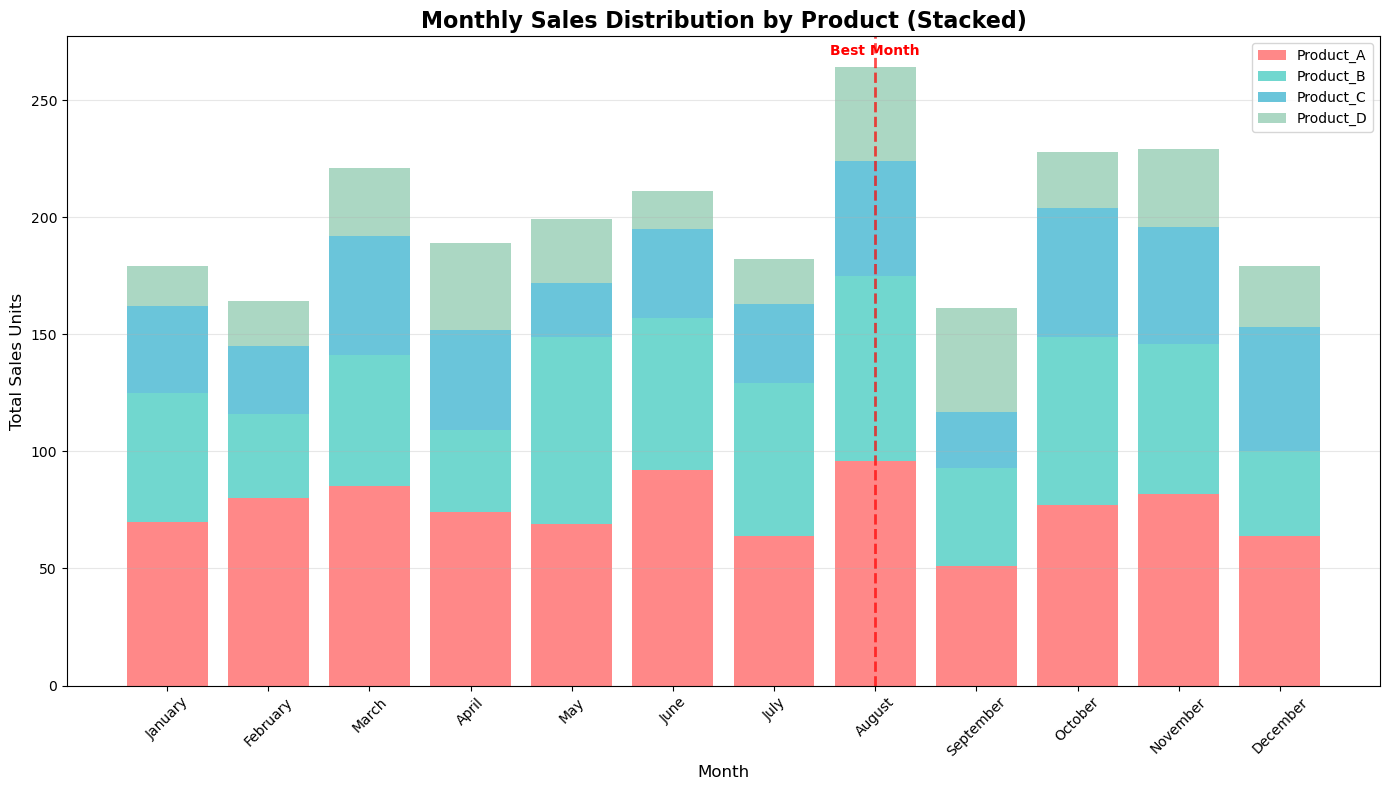

In [11]:
#Stacked Bar Chart
plt.figure(figsize=(14, 8))

# Create stacked bars
bottom = np.zeros(len(months))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, product in enumerate(product_columns):
    plt.bar(months, enhanced_df[product], bottom=bottom, label=product, color=colors[i], alpha=0.8)
    bottom += enhanced_df[product]

# Annotate best month
best_month_index = enhanced_df['Total_Sales'].idxmax()
plt.axvline(x=best_month_index, color='red', linestyle='--', alpha=0.7, linewidth=2)
plt.text(best_month_index, enhanced_df['Total_Sales'].max() * 1.02, 'Best Month', 
         ha='center', color='red', fontweight='bold')

plt.title('Monthly Sales Distribution by Product (Stacked)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Units', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

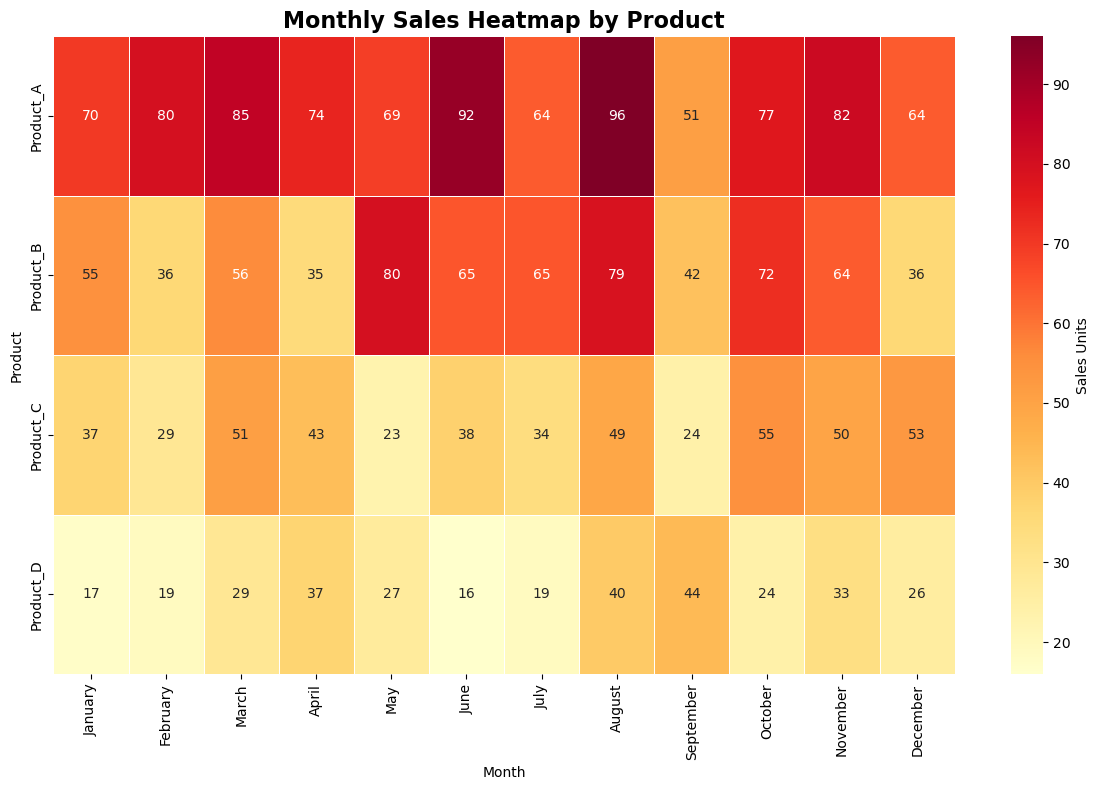

In [12]:
#Seaborn Heatmap
plt.figure(figsize=(12, 8))

# Prepare data for heatmap
heatmap_data = enhanced_df[product_columns].T
heatmap_data.columns = enhanced_df['Month_Name']

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5, 
            cbar_kws={'label': 'Sales Units'})
plt.title('Monthly Sales Heatmap by Product', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

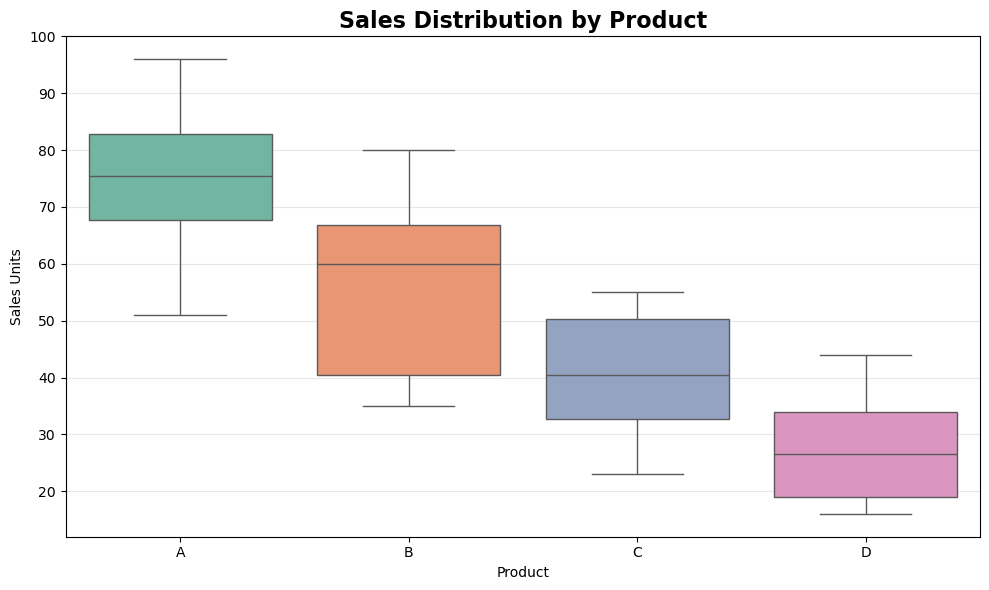

In [14]:
# Seaborn Boxplot 
plt.figure(figsize=(10, 6))

# Reshape data for boxplot
melted_df = enhanced_df[product_columns].melt(var_name='Product', value_name='Sales')
melted_df['Product'] = melted_df['Product'].str.replace('Product_', '')


sns.boxplot(data=melted_df, x='Product', y='Sales', hue='Product', 
            palette='Set2', legend=False)
plt.title('Sales Distribution by Product', fontsize=16, fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Sales Units')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

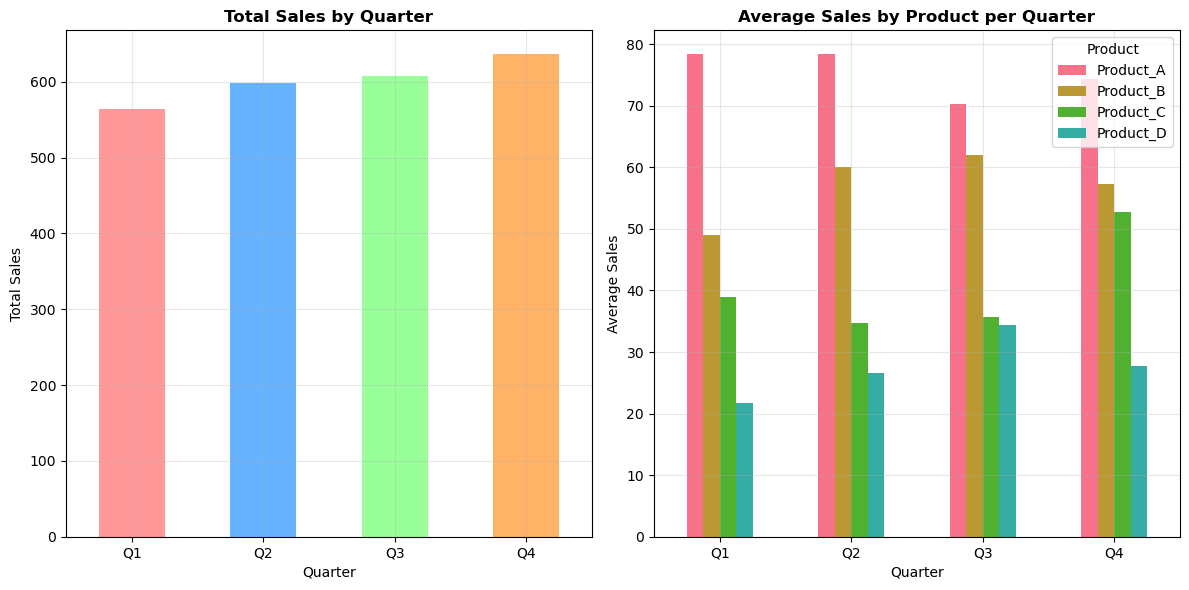

In [15]:
#Quarterly Performance
plt.figure(figsize=(12, 6))

# Quarterly totals bar chart
plt.subplot(1, 2, 1)
quarterly_totals.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99', '#FFB366'])
plt.title('Total Sales by Quarter', fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# Quarterly product performance
plt.subplot(1, 2, 2)
quarterly_pivot.plot(kind='bar', ax=plt.gca())
plt.title('Average Sales by Product per Quarter', fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Average Sales')
plt.legend(title='Product')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

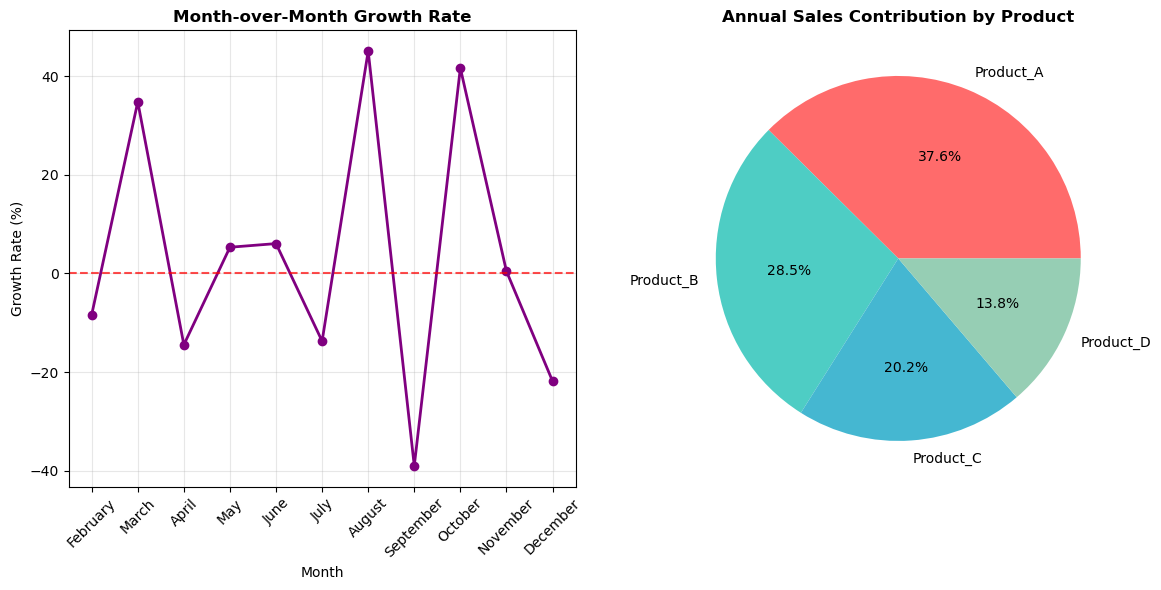

In [16]:
# Cell 12: Growth Analysis
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(enhanced_df['Month_Name'], enhanced_df['Month_over_Month_Growth'], 
         marker='o', color='purple', linewidth=2)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.title('Month-over-Month Growth Rate', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Product contribution pie chart
product_contributions = enhanced_df[product_columns].sum()
plt.pie(product_contributions, labels=product_contributions.index, autopct='%1.1f%%', 
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Annual Sales Contribution by Product', fontweight='bold')

plt.tight_layout()
plt.show()

In [17]:
# Cell 13: Conclusion and Business Insights
print("=== BUSINESS INSIGHTS & CONCLUSION ===")

print("\n1.  PRODUCT PERFORMANCE ANALYSIS:")
product_performance = enhanced_df[product_columns].sum().sort_values(ascending=False)
for i, (product, sales) in enumerate(product_performance.items(), 1):
    market_share = (sales / product_performance.sum()) * 100
    print(f"   {i}. {product}: {sales:,} units ({market_share:.1f}% of total)")

print(f"\n2.  BEST PERFORMING QUARTER ANALYSIS:")
print(f"   • {best_quarter} had the highest sales due to:")
q_data = enhanced_df[enhanced_df['Quarter'] == best_quarter]
for product in product_columns:
    q_avg = q_data[product].mean()
    annual_avg = enhanced_df[product].mean()
    diff = q_avg - annual_avg
    if diff > 0:
        print(f"     - {product}: {diff:.1f} units above annual average")

print(f"\n3.  GROWTH PATTERNS:")
positive_growth_months = len(enhanced_df[enhanced_df['Month_over_Month_Growth'] > 0])
growth_rate_avg = enhanced_df['Month_over_Month_Growth'].mean()
print(f"   • {positive_growth_months}/12 months showed positive growth")
print(f"   • Average growth rate: {growth_rate_avg:.1f}%")

print(f"\n4.  STRATEGIC RECOMMENDATIONS:")
print(f"   • Focus marketing on {best_product} (top performer)")
print(f"   • Analyze {best_quarter} success factors for replication")
print(f"   • Address seasonality in underperforming months")
print(f"   • Consider product bundling based on complementary sales patterns")

print(f"\n5.  NEXT YEAR PLANNING:")
worst_quarter = quarterly_totals.idxmin()
print(f"   • Target improvement in {worst_quarter} (lowest performing quarter)")
print(f"   • Set growth target: {growth_rate_avg + 5:.1f}% monthly growth")
print(f"   • Consider product diversification based on market share distribution")

=== BUSINESS INSIGHTS & CONCLUSION ===

1.  PRODUCT PERFORMANCE ANALYSIS:
   1. Product_A: 904 units (37.6% of total)
   2. Product_B: 685 units (28.5% of total)
   3. Product_C: 486 units (20.2% of total)
   4. Product_D: 331 units (13.8% of total)

2.  BEST PERFORMING QUARTER ANALYSIS:
   • Q4 had the highest sales due to:
     - Product_B: 0.2 units above annual average
     - Product_C: 12.2 units above annual average
     - Product_D: 0.1 units above annual average

3.  GROWTH PATTERNS:
   • 6/12 months showed positive growth
   • Average growth rate: 3.2%

4.  STRATEGIC RECOMMENDATIONS:
   • Focus marketing on Product_A (top performer)
   • Analyze Q4 success factors for replication
   • Address seasonality in underperforming months
   • Consider product bundling based on complementary sales patterns

5.  NEXT YEAR PLANNING:
   • Target improvement in Q1 (lowest performing quarter)
   • Set growth target: 8.2% monthly growth
   • Consider product diversification based on market s